# Библиотеки

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import pylab as p
from scipy import integrate
from matplotlib.backend_bases import KeyEvent
from scipy.integrate import ode, odeint
import math
from scipy.optimize import fsolve
import seaborn as sn

# Система с приростом ресурса (мю и гамма) - 2 вида

## **Модель**

In [ ]:
def equations(vars):
  S, N1, N2 = vars
  dS_dt = mu * (Smax  -  S) - (gamma1 * N1 * S) / (K1 + S) \
           - (gamma2 * N2 * S) / (K2 + S)
  dN1_dt = a1 * N1 * S / (K1 + S) - c1 * N1
  dN2_dt = a2 * N2 * S / (K2 + S) - c2 * N2

  return [dS_dt, dN1_dt, dN2_dt]

### Проверка

In [ ]:
def proverka(results={}):
  method_comp = {}
  trivial = {}
  best_method = []
  error_rate = 0.0000000001
  for name, res in results.items():
    print(name, np.round(res, 3))
    equ_res = 0
    trivial_ac = 0
    S, N1, N2 = res
    survive = int(N1) + int(N2)
    list_of_equations = [mu * (Smax  -  S) - (gamma1 * N1 * S) / (K1 + S)\
                        - (gamma2 * N2 * S) / (K2 + S), \
                        a1 * N1 * S / (K1 + S) - c1 * N1, \
                        a2 * N2 * S / (K2 + S) - c2 * N2]
    for equ in list_of_equations:
      equ_res += abs(equ)
    if len(results) < 2 and survive==0:
     best_method = name
     trivial[name] = equ_res
    elif len(results) <2 and survive!=0:
     best_method = name
     method_comp[name] = equ_res
    elif len(results) > 1 and survive==0:
      trivial[name] = equ_res
    elif len(results) > 1 and survive!=0:
      method_comp[name] = equ_res
  if len(results) > 1 and len(method_comp) > 0:
    best_method = min(method_comp, key=method_comp.get)
    if method_comp[best_method] > error_rate and len(trivial) > 0:
      best_method = min(trivial, key=trivial.get)
    elif method_comp[best_method] > error_rate and len(trivial)==0:
      print("No accurate results")
  elif len(method_comp) < 1 and len(results) > 1:
    best_method = min(trivial, key=trivial.get)
  final_comp = method_comp | trivial
  return best_method, final_comp

### Fsolve

In [ ]:
def fsolve_est():
  X, info, ier, mesg = fsolve(equations, np.array([1,1,1], dtype=float), \
                     full_output=True)
  print('Fsolve')
  print(mesg, np.round(X, 2))
  fsolve_results = X
  return fsolve_results

### Root

In [ ]:
def root_est():
  print(' ')
  print('Root')
  root_results = {}
  methods = ['lm', 'broyden1', 'broyden2', 'anderson', 'linearmixing',\
                'diagbroyden', 'excitingmixing', 'krylov', 'df-sane']
  try:
    for met in methods:
      sol = root(equations, np.array([1,1,1]), method = met)
      root_results[met] = sol.x
  except OverflowError as e:
    print("Overflow Error with ", met)


  #Проверка

  best_method, method_comp_res = proverka(root_results)
  print("best method of root function:", best_method)
  return root_results[best_method], method_comp_res

### Sympy

In [ ]:
def sympy_est():
  S, N1, N2  =  symbols('S, N1, N2', nonnegative=True)
  dS_dt = Eq(mu * (Smax  -  S) - (gamma1 * N1 * S) / (K1 + S) \
           - (gamma2 * N2 * S) / (K2 + S), 0)
  dN1_dt = Eq(a1 * N1 * S / (K1 + S) - c1 * N1, 0)
  dN2_dt = Eq(a2 * N2 * S / (K2 + S) - c2 * N2, 0)

  solutions = nonlinsolve([dS_dt, dN1_dt, dN2_dt], [S, N1, N2])
  results_sympy = {}
  j=0
  for sol in solutions:
    j+=1
    if all(val.is_nonnegative for val in sol):
      results_sympy[str(j)+" решение"] = [np.float64(val)for val in sol]
  print(' ')
  print('Sympy')
  best_result, comp_res = proverka(results_sympy)
  return results_sympy[best_result], comp_res

### Лучший результат 3 алгоритмов

In [ ]:
from scipy.optimize import fsolve
from scipy.optimize import root
from sympy import nonlinsolve, Eq, symbols
Smax = 20
mu = 0.1
gamma1 = 0.3
gamma2 = 0.5
a1 = 1.5
a2 = 1.5
K1 = 10
K2 = 10
c1 = 0.6
c2 = 0.6
S, N1, N2 = 1, 1, 1
def full_estimation():
  best_results_all = {}
  best_results_all['fsolve_res'] = fsolve_est()
  best_results_all['root_res'], root_comp_res = root_est()
  best_results_all['sympy_res'], sympy_comp_res = sympy_est()
  print(' ')
  print("Final Result")
  best_function, comp_function = proverka(best_results_all)
  print(' ')
  print("Best function:", best_function, "with error:", \
      round(comp_function[best_function],8), np.round(best_results_all[best_function], 2))
  return best_function, comp_function

In [ ]:
best_function, comp_function = full_estimation()

Fsolve
The solution converged. [6.67 4.17 4.17]
 
Root
lm [6.667 3.601 4.506]
broyden1 [20.  0.  0.]
broyden2 [20.  0.  0.]
anderson [20.  0.  0.]
linearmixing [6.667 4.167 4.167]
diagbroyden [20. -0. -0.]
excitingmixing [6.667 4.167 4.167]
krylov [6.667 4.167 4.167]
df-sane [20.  0.  0.]
best method of root function: lm
 
Sympy
1 решение [ 6.667 11.111  0.   ]
2 решение [20.  0.  0.]
 
Final Result
fsolve_res [6.667 4.167 4.167]
root_res [6.667 3.601 4.506]
sympy_res [ 6.667 11.111  0.   ]
 
Best function: sympy_res with error: 0.0 [ 6.67 11.11  0.  ]


# Интегрирование

## Функции служебные

In [ ]:
# График plotly: Evolution of species with competition for resources
def draw_integ_evol(dataframe):
  dataframe = dataframe.drop("Smax", axis=1)
  df = dataframe
  fig = px.line(df,
                 width=1200, height=800)
  fig.update_layout(
    title="Evolution of species with competition for resources",
    xaxis_title="t",
    yaxis_title="Quantity",
    legend_title="Resources and species",
  )
  fig.show()

In [ ]:
# построение таблицы для для интегрирования с остановкой
def make_df_evol(integr_result, t_list, column_names=[]):
  sol = np.array(integr_result).T
  dict = {}
  if len(column_names) > 0:
    df = pd.DataFrame(integr_result, columns=column_names[1:(len(sol)+1)])
    df.index = t_list
  else:
    for i in range(0, len(sol)):
      switch = (len(sol)+1)//2
      if i < switch:
        key = "S"+ str(i+1)
      else:
        key = "N"+ str(i - switch +1)
      dict[key] = sol[i]
      df = pd.DataFrame.from_dict(dict)
      df.index = t_list
  return(df)

In [ ]:
# Интегрировние - коээфициенты по отдельности
def integration_to_eps_many(dX_dt, t0, t1, dt, X0, K1, K2, a1, a2, c1, c2, mu, gamma1, gamma2, Smax, epsil=0.00005):
  r = ode(dX_dt)
  r.set_initial_value(X0, t0)
  r.set_f_params(K1, K2, a1, a2, c1, c2, mu, gamma1, gamma2, Smax)
  cur_step = 1
  integr_result = [X0]
  t_final = [0]

  for i in range(1, int(t1/dt)):
    if len(integr_result) < 100:
      cur_step = r.integrate(r.t + dt)
      integr_result.append(cur_step)
      t_final.append(r.t)
    else:
      if abs(np.sum(cur_step) - np.sum(np.mean(integr_result[i-100:i], axis=0))) > epsil:
        cur_step = r.integrate(r.t + dt)
        integr_result.append(cur_step)
        t_final.append(r.t)
      else:
        return integr_result, t_final

In [ ]:
# Весь анализ для чтения из таблицы: подготовка данных, график, интегрирование - таблицы с полным результатом и последними значениями.
def whole_cycle_table(data_set_table, dX_dt, t0, t1, dt, epsil=0.00005):
  full_integration_set = []
  last_stage_integration_set = []
  column_names = data_set_table.columns
  combined_last_stage_integration = []
  for i in range(0, len(data_set_table)):
    Smax = full_data.iloc[i]['Smax']
    mu = full_data.iloc[i]['mu']
    gamma1 = full_data.iloc[i]['gamma1']
    gamma2 = full_data.iloc[i]['gamma2']
    a1 = full_data.iloc[i]['a1']
    a2 = full_data.iloc[i]['a2']
    K1 = full_data.iloc[i]['K1']
    K2 = full_data.iloc[i]['K2']
    c1 = full_data.iloc[i]['c1']
    c2 = full_data.iloc[i]['c2']
    integr_result, t_final = integration_to_eps_many(dX_dt, t0, t1, dt, X, K1, K2, a1, a2, c1, c2, mu, gamma1, gamma2, Smax, epsil)
    data_one_step_res = make_df_evol(integr_result, t_final, column_names)
    full_integration_set.append(data_one_step_res)
    data_one_step_res.insert(0, 'Smax', Smax)
    data_one_step_res = data_one_step_res.reset_index(names='t')
    if len(combined_last_stage_integration) < 1:
      combined_last_stage_integration = data_one_step_res.tail(1)
    else:
      combined_last_stage_integration = pd.concat([combined_last_stage_integration, data_one_step_res.tail(1)], axis=0).reset_index(drop=True)
  return full_integration_set, combined_last_stage_integration

##   Уравнения для интегрирования

In [ ]:
def dX_dt(t, X, K1, K2, a1, a2, c1, c2, mu, gamma1, gamma2, Smax):

  S = X[0]
  N1 = X[1]
  N2 = X[2]

  dS_dt = mu * (Smax  -  S) - (gamma1 * N1 * S) / (K1 + S) \
           - (gamma2 * N2 * S) / (K2 + S)
  dN1_dt = a1 * N1 * S / (K1 + S) - c1 * N1
  dN2_dt = a2 * N2 * S / (K2 + S) - c2 * N2


  return np.array([dS_dt, dN1_dt, dN2_dt])


## Создание датасета для симуляции

In [ ]:
from random import randint
n = 40
Smax = [randint(70, 180) for p in range(0, n)]
mu = [0.1] * n
gamma1 = [0.3] * n
gamma2 = [0.6] * n
a1 = [1.5] * n
a2 = [1.5] * n
K1 = [10] * n
K2 = [10] * n
c1 = [0.6] * n
c2 = [0.6] * n
S = 10
N1 = 10
N2 = 10
full_data = pd.DataFrame(
    {'Smax': Smax,
     'S': S,
     'N1': N1,
     'N2': N2,
     'mu': mu,
     'gamma1': gamma1,
     'gamma2': gamma2,
     'a1': a1,
     'a2': a2,
     'K1': K1,
     'K2': K2,
     'c1': c1,
     'c2': c2,
    })
t0 = 0
t1 = 200
dt = 0.01
t = np.linspace(t0, t1, 10000)
X = np.concatenate((S, N1, N2), axis=None)

## Результат

In [ ]:
full_integration_set, combined_last_stage_integration =  whole_cycle_table(full_data, dX_dt, t0, t1, dt, epsil=0.00001)

In [ ]:
combined_last_stage_integration

,t,Smax,S,N1,N2
0,17.13,130.0,6.666602,34.263059,34.263059
1,18.33,173.0,6.666656,46.203933,46.203933
2,17.12,128.0,6.666614,33.707855,33.707855
3,17.30,145.0,6.666627,38.427673,38.427673
4,18.02,168.0,6.666652,44.815173,44.815173
5,17.29,144.0,6.666622,38.149995,38.149995
6,17.40,149.0,6.666619,39.538424,39.538424
7,24.19,80.0,6.666540,20.368679,20.368679
8,23.10,105.0,6.666656,27.314251,27.314251
9,18.44,176.0,6.666656,47.037219,47.037219


In [ ]:
draw_integ_evol(full_integration_set[0])

# Матрица корреляций

In [ ]:
corel_matrix = combined_last_stage_integration[combined_last_stage_integration.columns[1:]].corr()

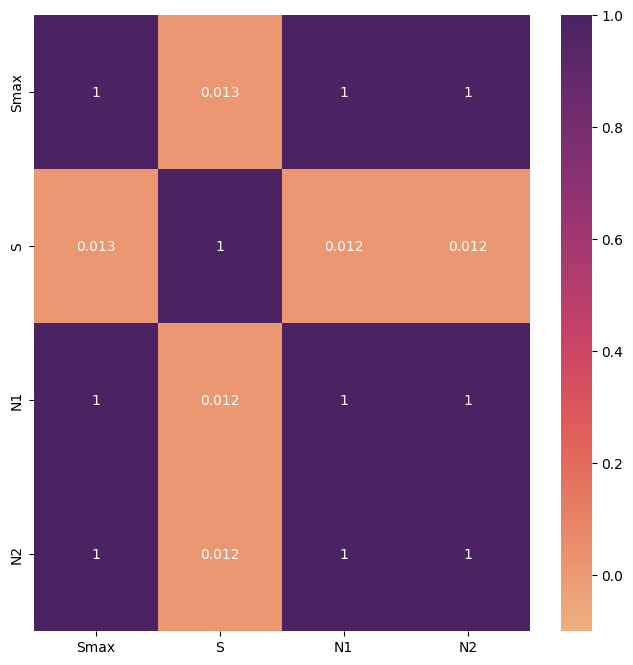

In [ ]:
plt.figure(figsize=(8,8))
sn.heatmap(corel_matrix, vmin=-0.1, vmax=1, cmap="flare", annot=True)
plt.show()